In [1]:
from tinygrad.engine import Value
from tinygrad.nn import Neuron, Layer, MLP
import matplotlib.pyplot as plt

## Implementing a Neural Network using tinygrad
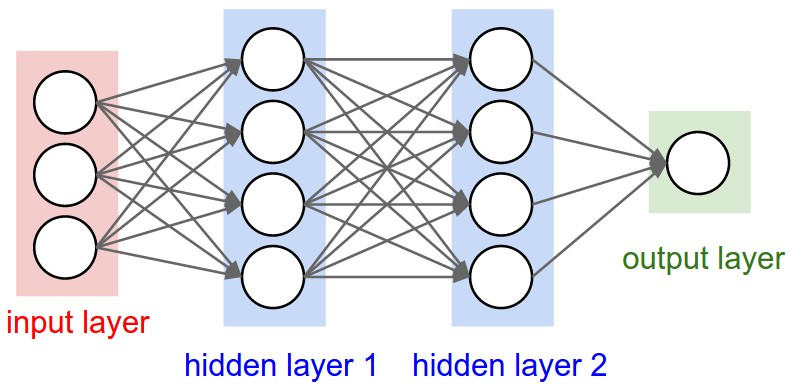

In [2]:
inputs = [4, 4, 1]
mlp = MLP(3, inputs)

In [3]:
x = [2.0, 3.0, -1.0]
o = mlp(x)

In [4]:
params = mlp.parameters()

In [5]:
# training the neural network
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

ys = [1.0, -1.0, -1.0, 1.0]

In [6]:
ypred = [mlp(input) for input in xs]
ypred

[data: -0.9522762826220262, grad: 0.0,
 data: -0.8204927452080223, grad: 0.0,
 data: -0.8086488074783325, grad: 0.0,
 data: -0.9586430034201908, grad: 0.0]

In [7]:
loss = sum([(pred - actual)**2 for pred, actual in zip(ypred, ys)])

In [8]:
loss

data: 7.716503231937759, grad: 0.0

In [12]:
step = 100
delta = -0.05
lossVals = []

for i in range(step):
    # zero grad 
    for p in params:
        p.grad = 0.0
    # back prop
    loss.backward()
    
    # adjust params
    for p in params:
        p.data += p.grad * delta

    # get predictions
    ypred = [mlp(input) for input in xs]
    
    # calculate loss
    loss = sum([(pred - actual)**2 for pred, actual in zip(ypred, ys)])
    lossVals.append(loss.data)
    print(i, loss.data)
        

0 0.00663108975366845
1 0.0065633519240992505
2 0.0064969787283737125
3 0.006431929394018399
4 0.006368164755515736
5 0.006305647175955206
6 0.0062443404732221795
7 0.006184209850420641
8 0.0061252218302492775
9 0.006067344193071568
10 0.006010545918439543
11 0.0059547971298485455
12 0.005900069042516996
13 0.005846333913999378
14 0.005793564997455128
15 0.005741736497408093
16 0.005690823527843177
17 0.005640802072497604
18 0.0055916489472135605
19 0.005543341764228955
20 0.005495858898290384
21 0.005449179454481328
22 0.0054032832376647195
23 0.005358150723446392
24 0.005313763030571968
25 0.005270101894675047
26 0.005227149643300377
27 0.005184889172130341
28 0.00514330392234762
29 0.0051023778590712525
30 0.005062095450807208
31 0.005022441649858128
32 0.004983401873640729
33 0.0049449619868616596
34 0.004907108284506849
35 0.004869827475600647
36 0.004833106667695054
37 0.004796933352050667
38 0.004761295389473753
39 0.00472618099677575
40 0.004691578733823773
41 0.004657477491151

In [10]:
ypred

[data: 0.9677467877303414, grad: 0.0,
 data: -0.9719043663082931, grad: 0.0,
 data: -0.9506610803018756, grad: 0.0,
 data: 0.9506414004605357, grad: 0.0]

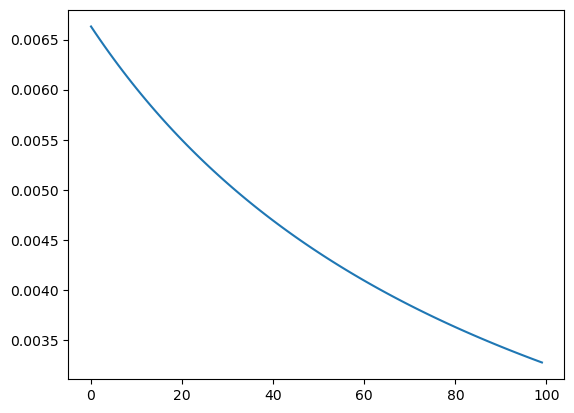

In [13]:
plt.plot(lossVals)